# Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt


In [2]:
print(os.listdir())

['.android', '.conda', '.condarc', '.continuum', '.eclipse', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.p2', '.VirtualBox', '.vscode', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'chromedriver.exe', 'CNN Project.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'images_cnn', 'IntelGraphicsProfiles', 'Kolhapur Price Analysis Project.ipynb', 'Kolhapur properties.xlsx', 'kolhapur_locations.csv', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TM.blf', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'PycharmProjects', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Tracing', 'Untitle

In [3]:
df=pd.read_excel("Kolhapur properties.xlsx")

In [4]:
df['Bed'].fillna(int(df['Bed'].median()), inplace=True)


In [5]:
#df=df.drop("Location",axis="columns")
df

,Location,squarefeet,Bed,Price(Rs)
0,E Ward,1243,3.0,11000000.0
1,Panhala,1500,2.0,5800000.0
2,Kathali,2831500,2.0,97000000.0
3,Phulewadi,1800,2.0,7000000.0
4,Kadamwadi,1200,2.0,6000000.0
...,...,...,...,...
552,Deokar Panand,979,2.0,3200000.0
553,Pachgaon,550,1.0,1800000.0
554,Mahadik Vasahat,850,2.0,4500000.0
555,Tarabai Park,1250,2.0,6015000.0


In [6]:
df.isnull().sum()

Location      0
squarefeet    0
Bed           0
Price(Rs)     0
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum()

Location      0
squarefeet    0
Bed           0
Price(Rs)     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    557 non-null    object 
 1   squarefeet  557 non-null    int64  
 2   Bed         557 non-null    float64
 3   Price(Rs)   557 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.8+ KB


In [9]:
df['Bed'] = df['Bed'].astype(int)

In [10]:
df['Bed'].unique()

array([ 3,  2,  4,  1, 10,  9,  8,  5,  7,  6])

In [11]:
df['Location'].unique()

array([' E Ward', ' Panhala', ' Kathali', ' Phulewadi', '  Kadamwadi',
       ' Balinge', 'New Palace Area', ' Rajopadhye Nagar', 'NEHRU NAGAR',
       ' Uchgaon', ' Mauje Ispurli', 'Shivaji Peth', '  Tarabai Park',
       ' Nagala Park', ' Sambhaji Nagar', ' ITI', ' Tamgav road',
       ' Puikhadi', 'Deshmukh Highschool', ' Rajendra Nagar',
       ' Ichalkaranji', 'At post Sheloli,Tal-Bhudargarh', 'Phulewadi',
       'New Shahupuri', ' Near Saraswati mangal karyalay', 'Gandhinagar',
       ' Amba', ' Baba Jarag Nagar',
       'dependent Builder Floor in Rajlaxmi Nagar', ' Kagal',
       ' shingnapur', ' Kasaba Bawada', ' Kadamwadi', ' Chandgad',
       'Ambewadi', ' Aptenagar', ' Wadipir', ' Kanerkar Nagar',
       ' Uttareshwar Peth', 'Laxminarayan Nagar', ' Sane Guruji Vasahat',
       ' Pachgaon', 'Karande mala ,saibaba colony Kolhapur',
       ' B- ward Jarag Naga', ' Mudshingi', ' Bapat Camp', 'Pachgaon',
       'dependent Builder Floor in Kanerkar Nagar', ' Gargoti',
       ' Sh

In [12]:
locations=pd.DataFrame({"Name":df["Location"].unique()})

In [13]:
locations["new name"]='Kolhapur'+locations['Name']

In [14]:
locations.head()

,Name,new name
0,E Ward,Kolhapur E Ward
1,Panhala,Kolhapur Panhala
2,Kathali,Kolhapur Kathali
3,Phulewadi,Kolhapur Phulewadi
4,Kadamwadi,Kolhapur Kadamwadi


In [16]:
lat_lon=[] # list that will store the lat and lon
geolocator=Nominatim(user_agent="app") # to establish connection 
for location in locations['new name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan) # if no location is there
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)
        
        
        
        

In [17]:
locations['geo_loc']=lat_lon

In [18]:
locations.head(10)

,Name,new name,geo_loc
0,E Ward,Kolhapur E Ward,NaN
1,Panhala,Kolhapur Panhala,"(16.8066833, 74.1125979)"
2,Kathali,Kolhapur Kathali,NaN
3,Phulewadi,Kolhapur Phulewadi,"(16.689140700000003, 74.18994793989897)"
4,Kadamwadi,Kolhapur Kadamwadi,"(16.71462455, 74.25526868714147)"
5,Balinge,Kolhapur Balinge,"(16.6895986, 74.1725766)"
6,New Palace Area,KolhapurNew Palace Area,NaN
7,Rajopadhye Nagar,Kolhapur Rajopadhye Nagar,NaN
8,NEHRU NAGAR,KolhapurNEHRU NAGAR,NaN
9,Uchgaon,Kolhapur Uchgaon,"(16.6969914, 74.27496020123672)"


In [19]:
locations.to_csv('kolhapur_locations.csv',index=False)

In [20]:
house_locations=pd.DataFrame(df['Location'].value_counts().reset_index())

In [21]:
house_locations.columns=['Name','count']
house_locations.head()

,Name,count
0,Nagala Park,20
1,Tarabai Park,20
2,Phulewadi,18
3,Kagal,16
4,Ichalkaranji,15


In [22]:
locations.shape


(264, 3)

In [23]:
Rest_locations.shape

NameError: name 'Rest_locations' is not defined

In [24]:
house_locations=house_locations.merge(locations,on='Name',how="left").dropna()
house_locations.head()

,Name,count,new name,geo_loc
0,Nagala Park,20,Kolhapur Nagala Park,"(16.710706950000002, 74.235390277957)"
1,Tarabai Park,20,Kolhapur Tarabai Park,"(16.7120318, 74.24504721182578)"
2,Phulewadi,18,Kolhapur Phulewadi,"(16.689140700000003, 74.18994793989897)"
3,Kagal,16,Kolhapur Kagal,"(16.5750891, 74.3152571)"
4,Ichalkaranji,15,Kolhapur Ichalkaranji,"(16.6959348, 74.4555755)"


In [25]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [26]:
np.array(house_locations['geo_loc'])

array([(16.710706950000002, 74.235390277957),
       (16.7120318, 74.24504721182578),
       (16.689140700000003, 74.18994793989897), (16.5750891, 74.3152571),
       (16.6959348, 74.4555755), (16.68984515, 74.22818893562221),
       (16.66305315, 74.226392786211), (16.67739055, 74.20302141828893),
       (16.7789886, 74.5564244), (16.6945771, 74.2453534),
       (16.6646285, 74.2706915), (16.9713255, 73.7979743),
       (16.739368849999998, 74.24528766734676),
       (16.6969914, 74.27496020123672), (16.67126965, 74.24407155695798),
       (16.67639115, 74.2110183536068), (16.72355675, 74.23542939254457),
       (16.8066833, 74.1125979), (16.763223850000003, 74.27279355145322),
       (16.71462455, 74.25526868714147), (16.7103509, 74.26236390138304),
       (16.7028406, 74.2480168), (16.687633050000002, 74.21570009905508),
       (16.66714985, 74.22638500455321),
       (16.685289349999998, 74.20214578813312), (16.6895986, 74.1725766),
       (16.6632879, 74.2427086), (16.64340565, 74

In [27]:
lat,lon=zip(*np.array(house_locations['geo_loc']))

In [28]:
house_locations['lat']=lat
house_locations['lon']=lon

In [29]:
house_locations.head()


,Name,count,new name,geo_loc,lat,lon
0,Nagala Park,20,Kolhapur Nagala Park,"(16.710706950000002, 74.235390277957)",16.710707,74.235390
1,Tarabai Park,20,Kolhapur Tarabai Park,"(16.7120318, 74.24504721182578)",16.712032,74.245047
2,Phulewadi,18,Kolhapur Phulewadi,"(16.689140700000003, 74.18994793989897)",16.689141,74.189948
3,Kagal,16,Kolhapur Kagal,"(16.5750891, 74.3152571)",16.575089,74.315257
4,Ichalkaranji,15,Kolhapur Ichalkaranji,"(16.6959348, 74.4555755)",16.695935,74.455575


In [30]:

from folium.plugins import HeatMap
basemap=generateBaseMap()

In [31]:
basemap

In [82]:
house_locations[['lat','lon','count']].values.tolist()

[[16.7120318, 74.24504721182578, 20.0],
 [16.710706950000002, 74.235390277957, 20.0],
 [16.689140700000003, 74.18994793989897, 18.0],
 [16.5750891, 74.3152571, 16.0],
 [16.6959348, 74.4555755, 15.0],
 [18.5243388, 73.8592081, 13.0],
 [16.67739055, 74.20302141828893, 11.0],
 [21.2607859, 79.6220913, 11.0],
 [16.7789886, 74.5564244, 9.0],
 [16.6945771, 74.2453534, 9.0],
 [16.6646285, 74.2706915, 8.0],
 [-4.42125065, 15.337076364914385, 8.0],
 [16.739368849999998, 74.24528766734676, 8.0],
 [25.6030053, 85.1623397, 7.0],
 [17.5489329, 75.7578266, 7.0],
 [16.6969914, 74.27496020123672, 7.0],
 [16.72355675, 74.23542939254457, 6.0],
 [16.67639115, 74.2110183536068, 6.0],
 [16.8066833, 74.1125979, 6.0],
 [16.71462455, 74.25526868714147, 5.0],
 [16.7103509, 74.26236390138304, 5.0],
 [28.6750317, 77.1304722, 5.0],
 [16.687633050000002, 74.21570009905508, 5.0],
 [20.0728013, 78.2501864, 5.0],
 [52.808826800000006, 6.62444921915651, 4.0],
 [21.093431, 81.0143459, 4.0],
 [16.7477491, 74.4211932, 4.

In [32]:
HeatMap(house_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [33]:
basemap


In [34]:
X=df.drop("Price(Rs)",axis="columns")

C:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price(Rs)', ylabel='Density'>

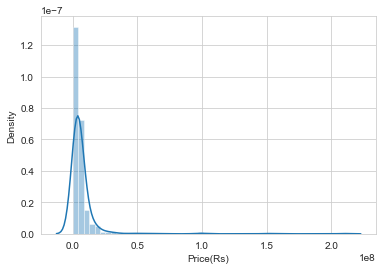

In [87]:
import seaborn as sns
sns.set_style(style='whitegrid')
sns.distplot(df['Price(Rs)'])

Text(0.5, 0, 'Number of outlets')

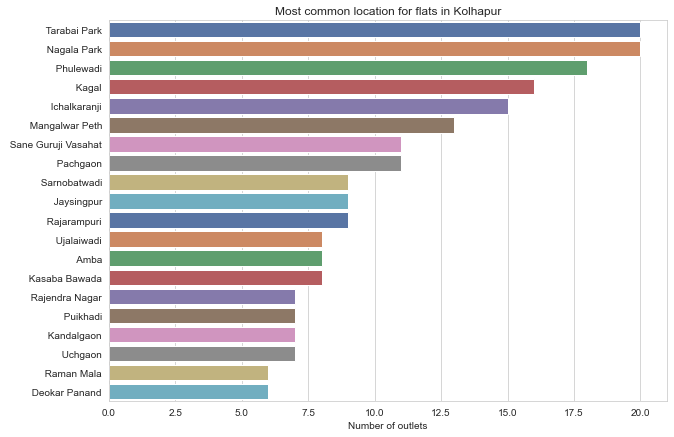

In [92]:
plt.figure(figsize=(10,7))
chains=df['Location'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep') 
plt.title("Most common location for flats in Kolhapur")
plt.xlabel("Number of outlets") 

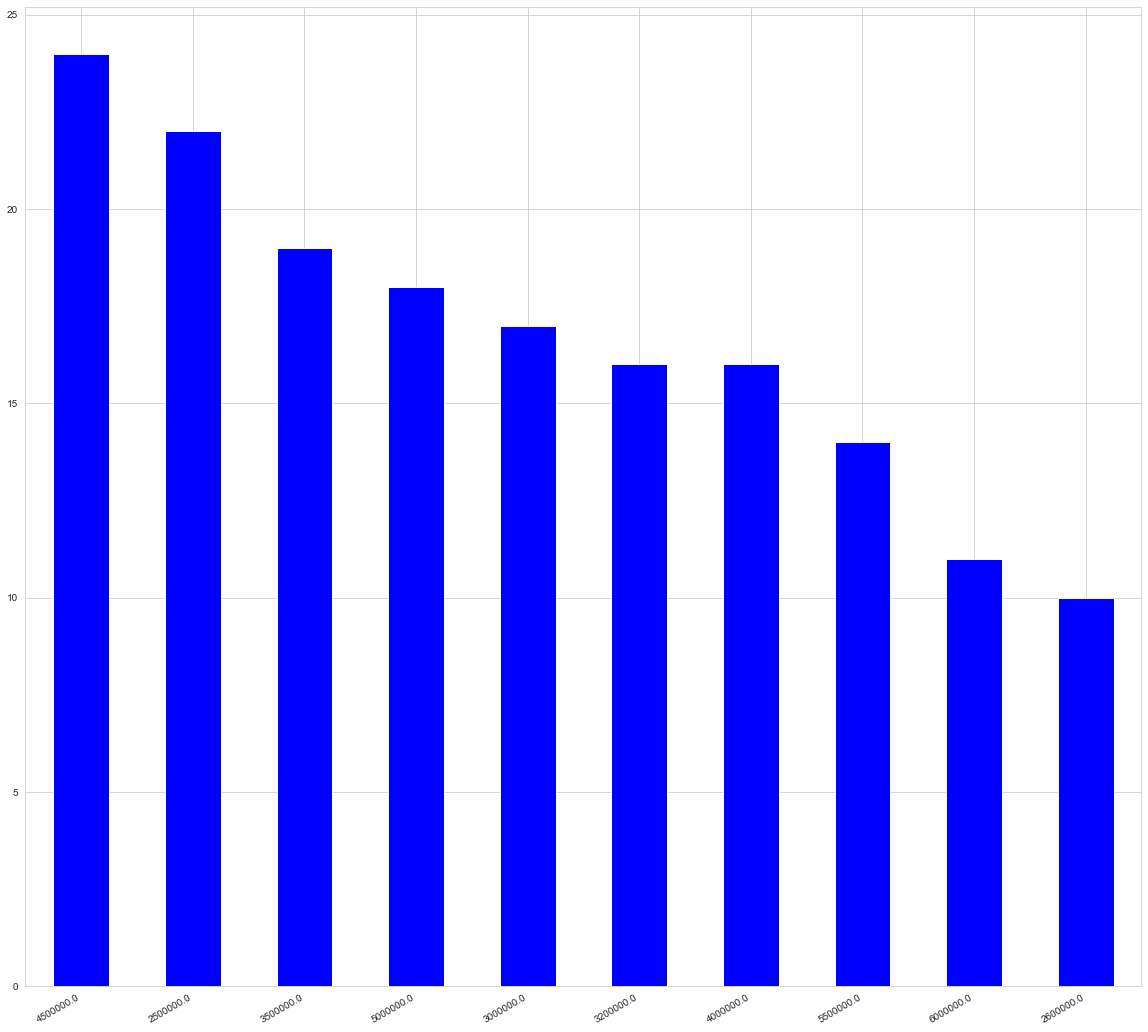

In [105]:
plt.figure(figsize=(20,20))
df['Price(Rs)'].value_counts().nlargest(10).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

In [35]:
X

,Location,squarefeet,Bed
0,E Ward,1243,3
1,Panhala,1500,2
2,Kathali,2831500,2
3,Phulewadi,1800,2
4,Kadamwadi,1200,2
...,...,...,...
552,Deokar Panand,979,2
553,Pachgaon,550,1
554,Mahadik Vasahat,850,2
555,Tarabai Park,1250,2


In [104]:
df['Price(Rs)'].describe()

count    5.570000e+02
mean     6.862693e+06
std      1.504624e+07
min      1.200000e+05
25%      2.500000e+06
50%      3.900000e+06
75%      6.200000e+06
max      2.100000e+08
Name: Price(Rs), dtype: float64

In [21]:
Y=df["Price(Rs)"]

In [22]:
Y.shape

(557,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [25]:
model.predict(X_test)

array([ 9420461.3393351 ,  1903088.52088851,  5667664.12497048,
        1908271.01236414,  5661303.79452311,  5654001.19289836,
        1903088.52088851,  5682552.00957319,  5630444.41346369,
        1903088.52088851,  9718487.91655769,  9400202.50902128,
        6098470.50727187,  5745872.63269361,  1909354.62421813,
        1895550.35146941,  5651645.5149549 ,  5661068.22672877,
        6108647.03598765,  6383507.53843147,  5633271.22699585,
        9404913.86490821,  1903088.52088851,  5638312.37779487,
        5659466.36572721,  5679913.65027651,  5656356.87084183,
        5734565.37856496,  5698759.07382425,  5656356.87084183,
        5637511.44729409,  5684625.00616344,  5639395.98964886,
        5642222.80318102,  1903559.6564772 ,  5651645.5149549 ,
       28154765.86907054,  5661680.70299407, 13208829.29064609,
       13148759.50308767,  5755295.34446748,  5739418.07512851,
        5716662.22619461,  5639395.98964886,  5684625.00616344,
        5736638.37515521,  5649289.83701

In [26]:
from sklearn.metrics import mean_squared_error 
y_pred=model.predict(X_test)
lin_mse=mean_squared_error(y_pred,y_test)
lin_rmse=np.sqrt(lin_mse)

In [27]:
lin_mse

367885128978261.8

In [22]:
df.describe()

,squarefeet,Bed,Price(Rs)
count,5.570000e+02,557.000000,5.570000e+02
mean,1.208297e+04,2.120287,6.862693e+06
std,1.274884e+05,0.914453,1.504624e+07
min,1.000000e+00,1.000000,1.200000e+05
25%,7.500000e+02,2.000000,2.500000e+06
50%,1.100000e+03,2.000000,3.900000e+06
75%,2.177000e+03,2.000000,6.200000e+06
max,2.831500e+06,10.000000,2.100000e+08


In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'squarefeet'}>,
        <AxesSubplot:title={'center':'Bed'}>],
       [<AxesSubplot:title={'center':'Price(Rs)'}>, <AxesSubplot:>]],
      dtype=object)

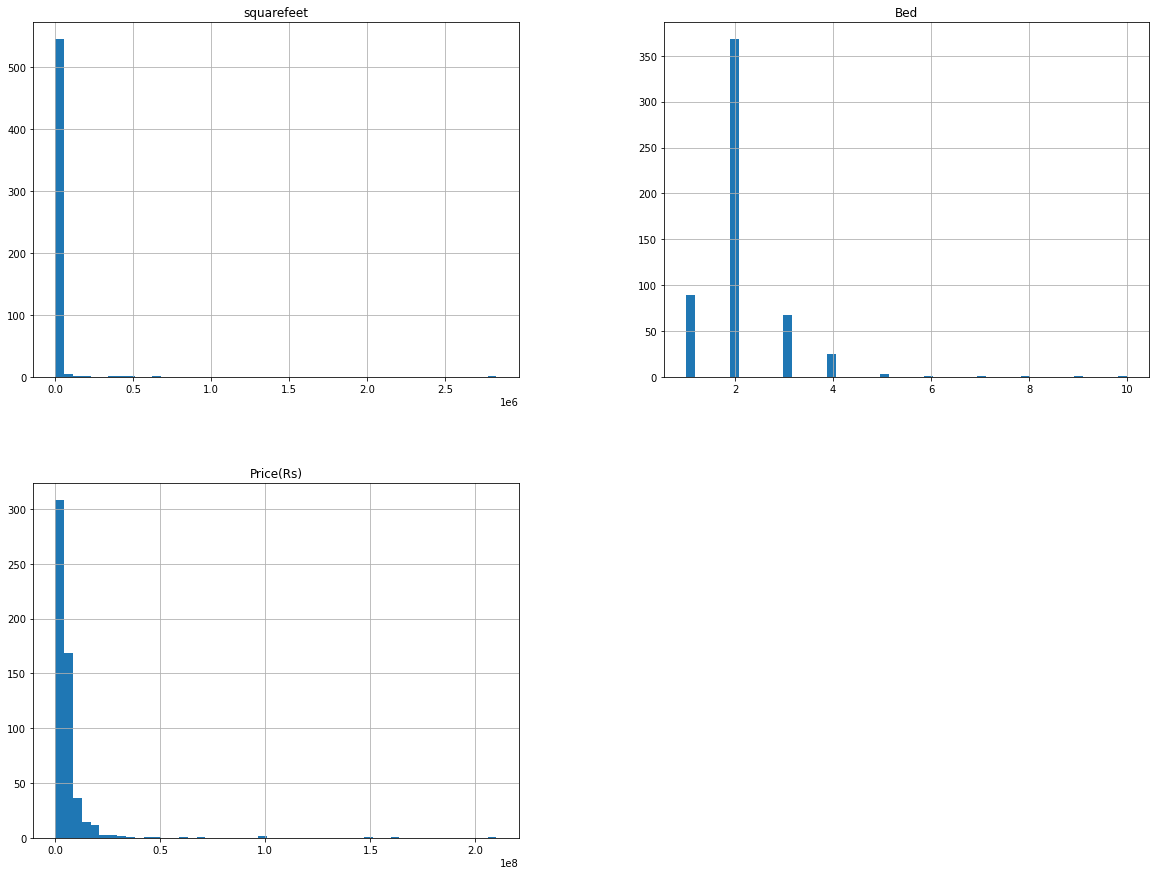

In [25]:
df.hist(bins=50,figsize=(20,15))

In [31]:
df.corr()

,squarefeet,Bed,Price(Rs)
squarefeet,1.000000,-0.008086,0.450663
Bed,-0.008086,1.000000,0.188989
Price(Rs),0.450663,0.188989,1.000000
